<a href="https://colab.research.google.com/github/sondosa20/DDA/blob/main/KOCILA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **Master 1 - Informatique Ingénierie des Données**
# *UE 260-251 Data Mining 1* (2025, Spring)
***
# ***Individual*** Laboratory Work on *Data Types, Description and Analysis*, 2025 Fall
## Due date : **Sunday, 16 february 23:59:59**
## Rename the notebook Work Report you will upload as ***NAME.ipynb***
***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn import datasets, preprocessing, metrics
import warnings
warnings.filterwarnings('ignore')

# 1) Load and Prepare the data
## Dataset : entire ***Titanic data*** on 2206 peaple aboard composed of 1316 passengers and 890 crew members, while only passengers are usually considered...

In [ ]:
titanic = pd.read_excel("/content/titanic_pass_crew.xls")
titanic.info() #Get the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2207 non-null   object 
 1   Gender    2207 non-null   object 
 2   Age       2205 non-null   float64
 3   Class     2207 non-null   object 
 4   Embarked  2207 non-null   object 
 5   Country   2126 non-null   object 
 6   Ticket    2206 non-null   float64
 7   Fare      2181 non-null   float64
 8   SibSp     1307 non-null   float64
 9   ParCh     1307 non-null   float64
 10  Survived  2207 non-null   object 
dtypes: float64(5), object(6)
memory usage: 189.8+ KB


#### ***Name*** : name and salutations
#### ***Gender*** : male/female
#### ***Age*** : in years, fractional if less than 1
#### ***Class*** : 1st, 2nd, 3rd for passengers deck, engine, restaurant, supply for crew
#### ***Embarked*** : port of embarkation (Belfast,Cherbourg,Queenstown,Southampton)
#### ***Country*** : nationality of passengers and crew members
#### ***Ticket*** : tiket number issued to the passenger
#### ***Fare*** : in pre-1970 British Pounds
#### ***SibSp*** : number of siblings or spouses of passenger aboard
#### ***ParCh*** : number of parents or childs of passenger aboard
#### ***Survived*** : yes/no


In [ ]:
 titanic.head()

,Name,Gender,Age,Class,Embarked,Country,Ticket,Fare,SibSp,ParCh,Survived
0,"Allen, Miss. Elisabeth Walton",female,29.000000,1st,South.,USA,24160.0,211.6009,0.0,0.0,yes
1,"Allison, Master. Hudson Trevor",male,0.916667,1st,South.,Canada,113781.0,151.1600,1.0,2.0,yes
2,"Allison, Miss. Helen Loraine",female,2.000000,1st,South.,Canada,113781.0,151.1600,1.0,2.0,no
3,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1st,South.,Canada,113781.0,151.1600,1.0,2.0,no
4,"Allison, Mrs. Bessie Waldo",female,25.000000,1st,South.,USA,113781.0,151.1600,1.0,2.0,no


In [ ]:
 titanic.tail()

,Name,Gender,Age,Class,Embarked,Country,Ticket,Fare,SibSp,ParCh,Survived
2202,"Wormald, Mr. Henry Frederick Charles",male,45.0,supply,South.,England,0.0,0.0,NaN,NaN,no
2203,"Wrapson, Mr. Frederick Bernard",male,19.0,supply,Belfast,England,0.0,0.0,NaN,NaN,no
2204,"Wright, Mr. Frederick",male,24.0,supply,South.,England,0.0,0.0,NaN,NaN,no
2205,"Wright, Mr. William",male,40.0,supply,South.,England,0.0,0.0,NaN,NaN,yes
2206,"Yearsley, Mr. Harry",male,40.0,supply,South.,England,0.0,0.0,NaN,NaN,yes


In [ ]:
num_names = titanic.select_dtypes(include=np.number,exclude='object').columns.tolist()
cat_names = titanic.select_dtypes(include=['category','object']).columns[1:].tolist()
print('Colonnes numériques :',num_names)
print('Colonnes catégoriques :',cat_names)

Colonnes numériques : ['Age', 'Ticket', 'Fare', 'SibSp', 'ParCh']
Colonnes catégoriques : ['Gender', 'Class', 'Embarked', 'Country', 'Survived']


In [ ]:
titanic[cat_names].describe().T

,count,unique,top,freq
Gender,2206,2,male,1717
Class,2206,7,3rd,708
Embarked,2206,4,South.,1615
Country,2206,47,England,1206
Survived,2206,2,no,1496


In [ ]:
titanic['Age'].std()

12.148717629055557

- Un écart-type de 12 ans est relativement élevé , ce qui indique une grande variabilité des âges parmi les passagers.

<Axes: xlabel='Fare'>

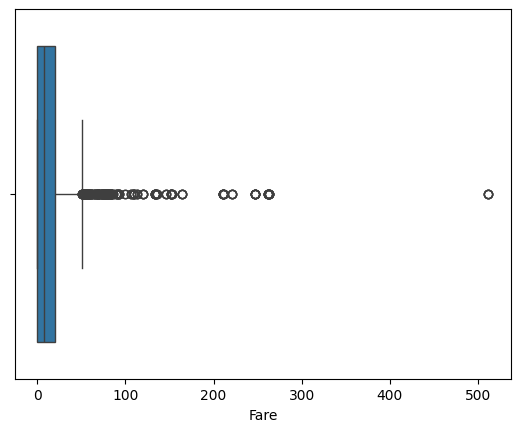

In [ ]:
sb.boxplot(x=titanic["Fare"])

# 2) Dealing with missing values

In [ ]:
print('Missing values :\n', titanic.isnull().sum())

Missing values :
 Name          0
Gender        0
Age           2
Class         0
Embarked      0
Country      81
Ticket        1
Fare         26
SibSp       900
ParCh       900
Survived      0
dtype: int64


## There is only one people who's ***Ticket*** is missing, who's passenger is it ?

In [ ]:
titanic[titanic['Ticket'].isnull()]

,Name,Gender,Age,Class,Embarked,Country,Ticket,Fare,SibSp,ParCh,Survived
1263,"Törnquist, Mr. William Henry",male,26.0,3rd,South.,Sweden,NaN,NaN,0.0,0.0,yes


## Not being sure that this man is meaningful, we can drop him.   

In [ ]:
titanic.drop([1263],inplace=True)

## Two ***Age*** values are missing. Instead of dropping the passenger, we can impute some value to them. Which value?



*  Si Age suit une distribution normale symétrique (mean plus robuste)sinon si elle est asymétrique avec des outliers (median plus robuste):



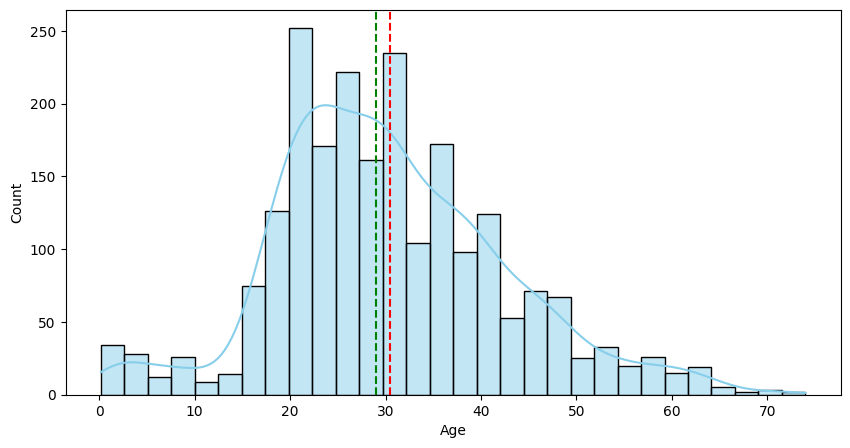

Moyenne de l'âge: 30.446460980036253
Médiane de l'âge: 29.0
Écart-type de l'âge: 12.154152933382894


In [ ]:
# Visualisation de la distribution de `Age`
plt.figure(figsize=(10,5))
sb.histplot(titanic['Age'], bins=30, kde=True, color='skyblue')
plt.axvline(titanic['Age'].mean(), color='red', linestyle='dashed', label="Moyenne")
plt.axvline(titanic['Age'].median(), color='green', linestyle='dashed', label="Médiane")
plt.show()

# Comparaison des statistiques
print("Moyenne de l'âge:", titanic['Age'].mean())
print("Médiane de l'âge:", titanic['Age'].median())
print("Écart-type de l'âge:", titanic['Age'].std())

Puisque la Distribution esy légèrement asymétrique vers la droite (présence de valeurs élevées), la médiane est plus fiable cdans ce cas car elle n'est pas influencée par les outliers


In [ ]:
titanic.Age.fillna(titanic.Age.median(),inplace=True)

## More ***Fare*** values are missing. Is a similar imputation is the best idea ?

In [ ]:
titanic.groupby(['Class'])['Fare'].mean()

,Fare
Class,
1st,89.017344
2nd,21.503081
3rd,12.927864
deck,0.000000
engine,0.000000
restauration,0.000000
supply,0.000000


In [ ]:
print(titanic.groupby(['Class'])['Fare'].median())

Class
1st             61.07070
2nd             15.06035
3rd              8.01000
deck             0.00000
engine           0.00000
restauration     0.00000
supply           0.00000
Name: Fare, dtype: float64


j'ai choisi d'utiliser la médiane pour chaque classe car elle est moins influencée par les billers extremement chers en 1 er class (une a plus de 500£ par exemple), ce qui reflete mieux le tarif habituel

In [ ]:
titanic.Fare.fillna(titanic.groupby(['Class'])['Fare'].transform('median'),inplace=True)

## What about the much more missing ***Country*** values imputation ?

In [ ]:
titanic['Country'].value_counts()

,count
Country,
England,1125
USA,264
Ireland,137
Sweden,104
Lebanon,71
Finland,54
Scotland,36
Canada,34
Norway,26


England est la natinalité dominante, on remplace par le mode car c'est efficace, et logique pour une variable catégoriques comme country

In [ ]:
titanic.Country.fillna(titanic['Country'].describe().top,inplace=True)

## Why ***SibSp*** and ***ParCh*** have so  many missing values?

In [ ]:
titanic.groupby(['Class'])['SibSp'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1st,324.0,0.435185,0.608604,0.0,0.0,0.0,1.0,3.0
2nd,276.0,0.394928,0.590694,0.0,0.0,0.0,1.0,3.0
3rd,706.0,0.570822,1.301913,0.0,0.0,0.0,1.0,8.0
deck,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restauration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
supply,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La pluspart des passagers voyageaient seuls, et le crew ne voyageait pas avec leur famille -Ils travaillent- donc NaN (ce n'est pas vraiment a missing value, mais juste pour indiquer que la personne n'avait pas de famille à bord) est donc on remplace par 0

In [ ]:
titanic.SibSp.fillna(0,inplace=True)
titanic.ParCh.fillna(0,inplace=True)

## Do you think salutations in ***Name*** merit further investigation?
## I found some code in the internet to gather values ...

In [ ]:
titanic['Title'] = titanic['Name'].str.extract(r',\s(.*?)(?=\.)') #car titanic['Name'] contient des valeurs sous forme: "Allen, Miss. Elisabeth Walton	"
titanic["Title"].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Colonel', 'Mme', 'Dr', 'Major',
       'Captain', 'Lady', 'Sir', 'Mlle', 'Doña', 'Don', 'Col', 'Revd',
       'Fr', 'Sra', 'Rev', 'Sr', 'Ms', 'Sig'], dtype=object)

In [ ]:
new_title = {'Miss':'Ms','Master':'Mr','Mr':'Mr','Mrs':'Mrs','Mme':'Mrs','Ms':'Ms','Miss':'Ms','Mlle':'Ms',
             'Sir':'Other','Sr':'Other','Sra':'Other','Don':'Other','Jonkheer':'Other','Lady':'Other','Countess':'Other',
             'the Countess':'Other','Dona':'Other','Doña':'Other','Rev': 'Other','Revd':'Other','Sig': 'Other','Fr':'Other',
             'Captain':'Other','Capt':'Other','Col':'Other','Colonel':'Other','Major':'Other','Dr':'Other'
}
titanic['NewTitle'] = titanic['Title'].map(new_title)

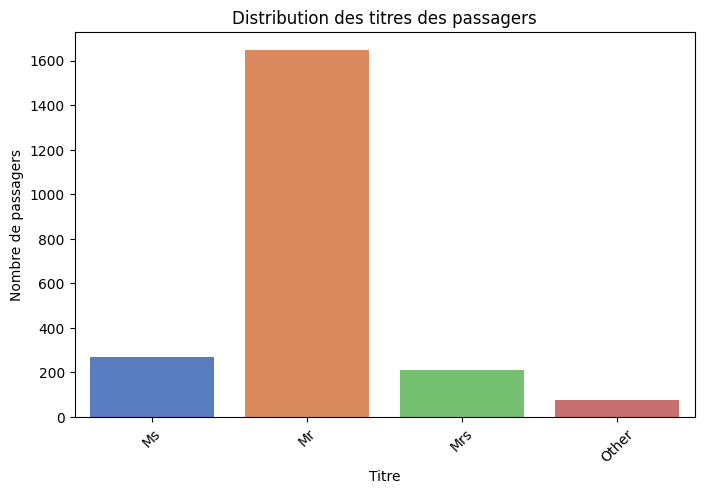

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(x="NewTitle", data=titanic, palette="muted")
plt.title("Distribution des titres des passagers")
plt.xlabel("Titre")
plt.ylabel("Nombre de passagers")
plt.xticks(rotation=45)
plt.show()

-**Intérprétation**:

*   la majorité des passagers étaient des hommes adultes.
*   il y avait moins de femmes que d’hommes à bord.


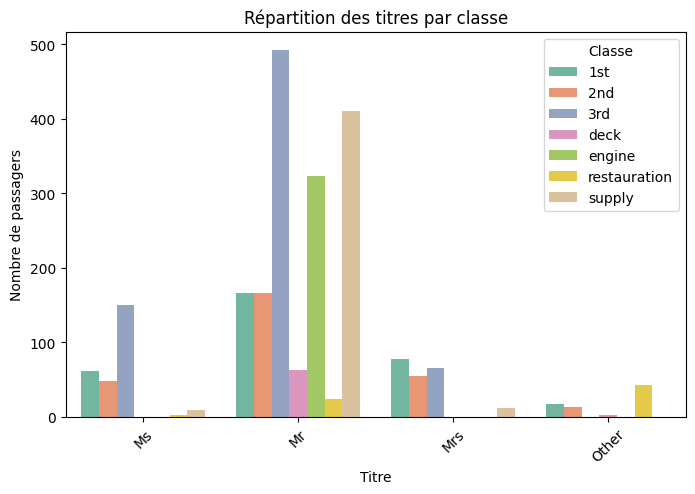

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(x="NewTitle", hue="Class", data=titanic, palette="Set2")
plt.title("Répartition des titres par classe")
plt.xlabel("Titre")
plt.ylabel("Nombre de passagers")
plt.xticks(rotation=45)
plt.legend(title="Classe")
plt.show()

-**Interprétation**:

*   Mr. est présent dans toutes les classes, mais surtout en 3ème classe.
*   Mrs. et Ms sont plus nombreuses en 1ère et 2ème classe.
*   Other(noblesse, militaires, religieux) est dominant en 1ère classe, ce qui confirme qu'ils avaient un statut privilégié.

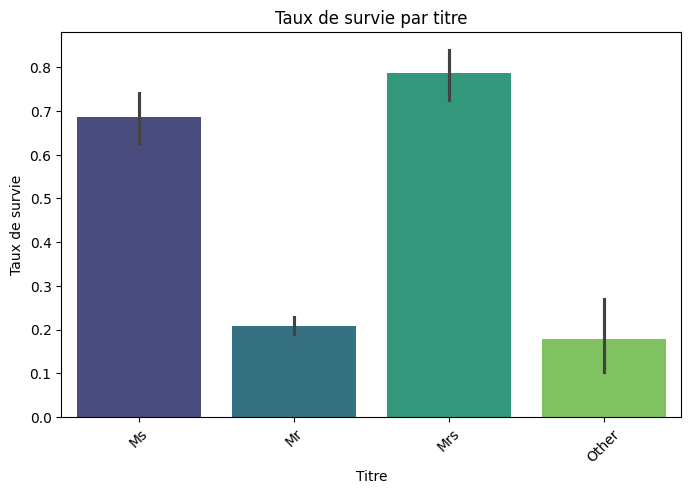

In [ ]:
titanic['Survived_Num'] = titanic['Survived'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(8,5))
sb.barplot(x="NewTitle", y="Survived_Num", data=titanic, palette="viridis")
plt.title("Taux de survie par titre")
plt.xlabel("Titre")
plt.ylabel("Taux de survie")
plt.xticks(rotation=45)
plt.show()


-**Intérpretation**:


*   Mrs et Ms ont un taux de survie plus élevé que Mr

*   Mr a le taux de survie le plus bas, (les hommes en 3rd class n'ont pas eu accès aux canots de sauvetage)

*   Other a un taux de survie elevé (les personnes de statut social élevé étaient mieux protégées)



## You may be interested in defining new (numerical and categorical). Feel free...

In [ ]:
titanic["Family"] = titanic["SibSp"] + titanic["ParCh"] + 1

In [ ]:
new_class = {'1st':'1st','2nd':'2nd','3rd':'3rd',
             'deck':'crew','engine':'crew','restauration':'crew','supply':'crew'
            }
titanic['NewClass'] = titanic['Class'].map(new_class)

In [ ]:
print(titanic['NewClass'].unique())

['1st' '2nd' '3rd' 'crew']


#Analyse de la survie selon NewClass

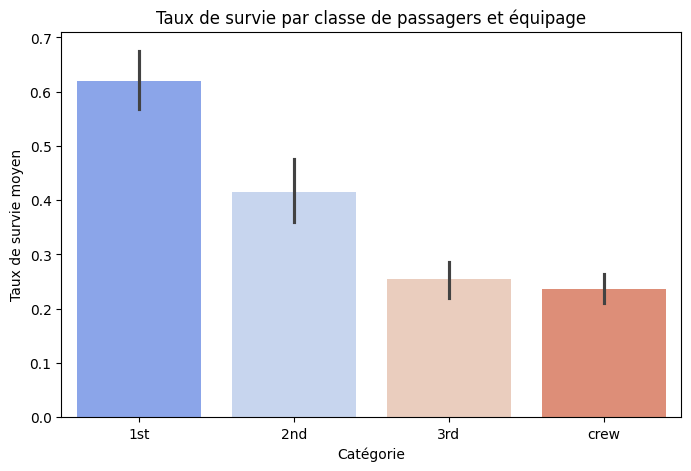

In [ ]:
plt.figure(figsize=(8,5))
sb.barplot(x="NewClass", y=titanic["Survived"].map({'yes':1, 'no':0}), data=titanic, palette="coolwarm")
plt.title("Taux de survie par classe de passagers et équipage")
plt.xlabel("Catégorie")
plt.ylabel("Taux de survie moyen")
plt.show()

-**Interprétation**:


*    Les passagers de 1ère classe ont le taux de survie le plus élevé (~63%) --> Les passagers en 1ère classe ont eu un traitement préférentiel lors de l’évacuation..
*    Le taux de survie diminue en 2ème (Moyen ~45% ) et 3ème classe(Fiable ~25%) --> Peut etre que les cabines étaient plus éloignées des sorties vers les canots.
*    L’équipage a un taux de survie aussi faible que la 3ème classe (~25%) -->  Peut etre que beaucoup de membres d'équipage ont aidé à l’évacuation plutôt que de se sauver eux-mêmes.



In [ ]:
bins = [0,12,19,59,100]
labels = ['Infant','Teen','Adult','Senior']
titanic['AgeCat'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)
print(titanic['AgeCat'].value_counts())

AgeCat
Adult     1888
Teen       153
Infant     106
Senior      59
Name: count, dtype: int64


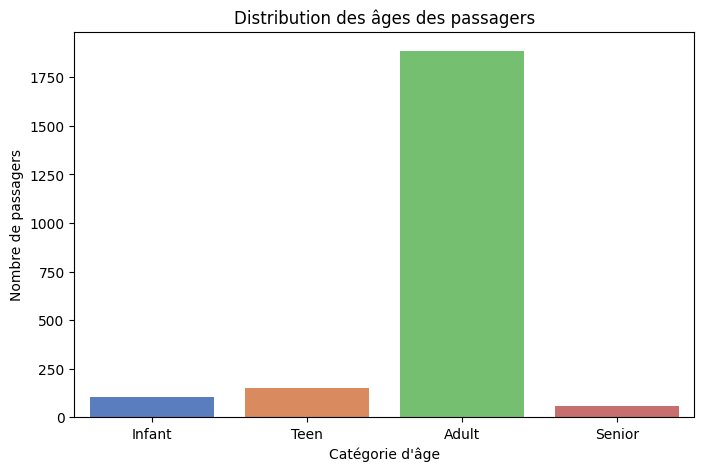

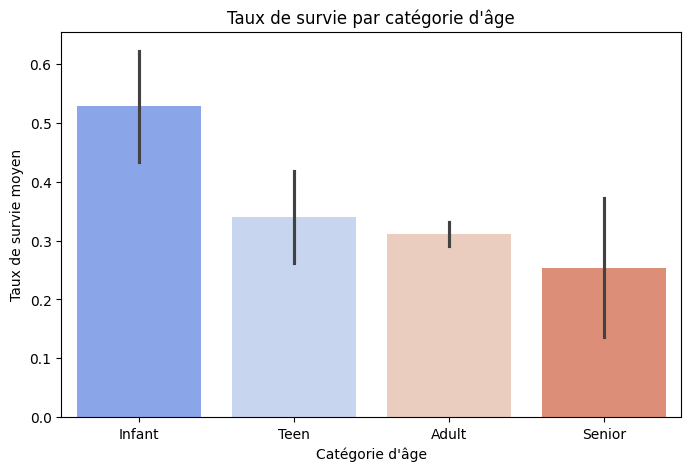

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(x="AgeCat", data=titanic, palette="muted")
plt.title("Distribution des âges des passagers")
plt.xlabel("Catégorie d'âge")
plt.ylabel("Nombre de passagers")
plt.show()

plt.figure(figsize=(8,5))
sb.barplot(x="AgeCat", y=titanic["Survived"].map({'yes':1, 'no':0}), data=titanic, palette="coolwarm")
plt.title("Taux de survie par catégorie d'âge")
plt.xlabel("Catégorie d'âge")
plt.ylabel("Taux de survie moyen")
plt.show()


-**interpretation**:


*   Les adultes (19-59 ans) sont la grande majorité des passagers.
*   Les adultes étaient plus nombreux, donc leur taux de survie pourrait être plus bas en raison de la compétition pour les places dans les canots.
*   les enfants ont été prioritaires.
*   les personnes âgées ont eu plus de difficultés à survivre.

In [ ]:
print(sorted(titanic['Fare'].unique()))

[5.0, 10.1, 10.1402, 11.1, 12.0, 12.0506, 12.07, 12.1006, 12.1706, 13.0, 13.1, 13.151, 13.1702, 13.1703, 14.1, 15.0, 15.1107, 16.0, 21.0, 23.0, 24.0, 25.1109, 25.141, 25.1806, 25.1807, 26.0, 26.05, 26.0508, 26.0509, 26.11, 27.0, 27.0811, 27.1405, 27.15, 28.1, 28.1009, 28.1403, 29.0, 29.14, 30.0, 30.1, 30.1311, 31.0, 31.1, 31.1307, 31.1308, 32.0605, 32.1, 33.0, 33.1, 34.0, 34.1301, 35.0, 35.1, 36.15, 37.0, 38.1, 39.0, 39.08, 39.12, 40.0206, 41.1107, 42.08, 42.1, 45.1, 47.02, 49.1, 49.1001, 50.0, 50.0911, 51.0907, 51.1703, 52.0, 52.1101, 53.02, 55.0, 55.081, 55.18, 56.1807, 57.0, 57.15, 57.1907, 59.08, 60.0, 61.0306, 61.0707, 61.1907, 63.0702, 65.0, 66.12, 69.06, 71.0, 71.0508, 73.1, 75.041, 75.05, 76.051, 76.1407, 77.0509, 77.1902, 78.0504, 79.0, 79.04, 79.13, 80.0, 81.1702, 82.0305, 82.0504, 83.0302, 83.0906, 86.1, 89.0201, 90.0, 93.1, 100.0, 106.0806, 108.18, 110.1708, 113.0506, 120.0, 133.13, 135.1208, 136.1507, 146.1005, 151.16, 153.0903, 211.0609, 211.1, 211.6009, nan, 0.0, 3.0305,

In [ ]:
bins = [0, 5, 10, 15, 25, 50, 100, 150]
labels = ['Ultra Low', 'Very Low', 'Low', 'Medium', 'High', 'Very High','VIP']

titanic['FareCat'] = pd.cut(titanic['Fare'], bins=bins, labels=labels, right=False)

In [ ]:
print(titanic['FareCat'].value_counts())

FareCat
Ultra Low    892
Very Low     474
High         245
Low          181
Very High    157
Medium       147
VIP           34
Name: count, dtype: int64


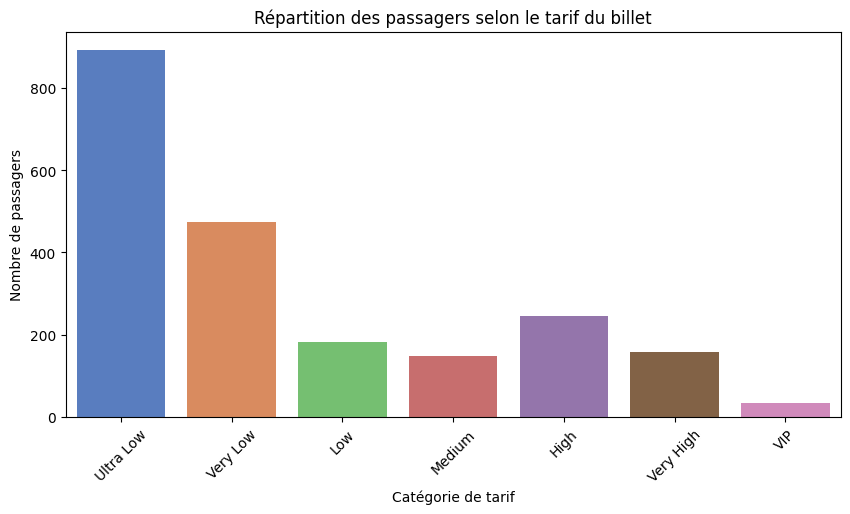

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(x="FareCat", data=titanic, palette="muted")
plt.title("Répartition des passagers selon le tarif du billet")
plt.xlabel("Catégorie de tarif")
plt.ylabel("Nombre de passagers")
plt.xticks(rotation=45)
plt.show()


-**Interprétation**:

*   La majorité des passagers ont payé des billets(Ultra Low et Very Low).
*   La distribution suit une tendance décroissante : plus le prix du billet est élevé, moins il y a de passagers.

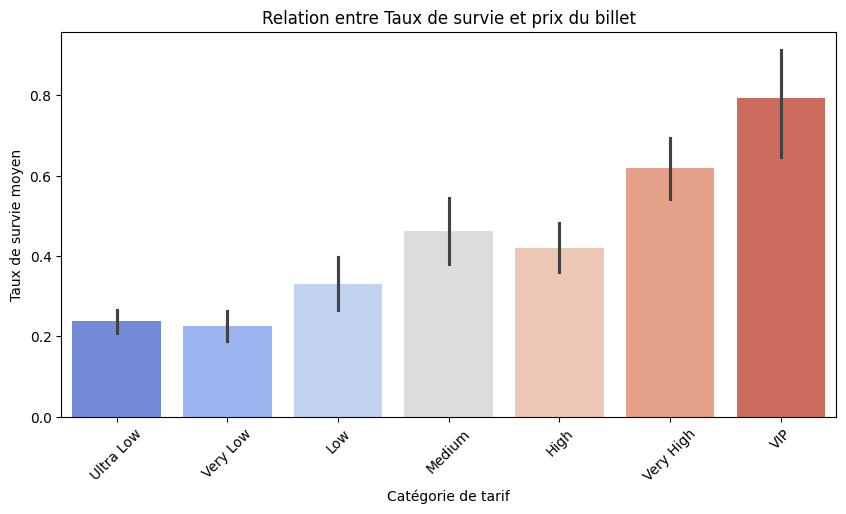

In [ ]:
plt.figure(figsize=(10,5))
sb.barplot(x="FareCat", y=titanic["Survived"].map({'yes':1, 'no':0}), data=titanic, palette="coolwarm")
plt.title("Relation entre Taux de survie et prix du billet")
plt.xlabel("Catégorie de tarif")
plt.ylabel("Taux de survie moyen")
plt.xticks(rotation=45)
plt.show()

-**Interprétation**:


*   Plus le billet est cher, plus le taux de survie est élevé.
*   Les passagers ayant payé moins cher (Ultra Low, Very Low, Low) ont eu le plus de pertes ils ont reçu moins de priorités que les passagers de 1ère et 2ème classe.


## Don't forget to drop unsed features, e.g.

In [ ]:
unused = ['Name','Ticket','Title']
titanic.drop(columns=unused,inplace=True)

## You also can split the data set and analyze ***Crew*** data separately!

In [ ]:
grouped = titanic.groupby(['NewClass'])
titanic_crew = grouped.get_group('crew')
titanic_crew.shape

(890, 16)

In [ ]:
titanic

,Gender,Age,Class,Embarked,Country,Fare,SibSp,ParCh,Survived,NewTitle,Survived_Num,Family,NewClass,AgeCat,FareCat,Deck
0,female,29.000000,1st,South.,USA,211.6009,0.0,0.0,yes,Ms,1,1.0,1st,Adult,NaN,Unknown
1,male,0.916667,1st,South.,Canada,151.1600,1.0,2.0,yes,Mr,1,4.0,1st,Infant,NaN,Unknown
2,female,2.000000,1st,South.,Canada,151.1600,1.0,2.0,no,Ms,0,4.0,1st,Infant,NaN,Unknown
3,male,30.000000,1st,South.,Canada,151.1600,1.0,2.0,no,Mr,0,4.0,1st,Adult,NaN,Unknown
4,female,25.000000,1st,South.,USA,151.1600,1.0,2.0,no,Mrs,0,4.0,1st,Adult,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,male,45.000000,supply,South.,England,0.0000,0.0,0.0,no,Mr,0,1.0,crew,Adult,Ultra Low,Unknown
2203,male,19.000000,supply,Belfast,England,0.0000,0.0,0.0,no,Mr,0,1.0,crew,Adult,Ultra Low,Unknown
2204,male,24.000000,supply,South.,England,0.0000,0.0,0.0,no,Mr,0,1.0,crew,Adult,Ultra Low,Unknown
2205,male,40.000000,supply,South.,England,0.0000,0.0,0.0,yes,Mr,1,1.0,crew,Adult,Ultra Low,Unknown


***
# Now, it's up to you !!
# What what did you learn today?
***
# Pay particular attention to ***joint DDA (two numerical features, two categorical features, one categorical and one numerical)***, I want to grade your ***new*** skills.
# Don't forget to set (upwards or downwards) your personal thresholds so that there are something to say about the results.
***

## The main Titanic data investigations on internet adress the chances of surviving. People intend to answer questions like: did some features (***Gender***, ***Pclass***, etc) affects the chances of surviving? Was "women and children first" the rule aboard? Etc.
## If you intend to find solutions on-line, forget it. Studies only focus on ***Passengers*** so that ***Pclass*** is numerical, as well as ***Survived***. They both are categorical in this dataset, as they should be.
# Anyway, I want to grade your skills in ***joint DDA*** whatever the features. So do not focus on ***the chances of surviving*** because I really ***don't care*** of it.


***
# Go now !!
***

#Relation entre Age et Fare -Numérique Vs Numérique-

In [ ]:
num_names = ['Age', 'Fare', 'Family']
titanic[num_names].cov(ddof=0)

,Age,Fare,Family
Age,147.591340,61.959500,-3.428853
Fare,61.959500,1883.772999,18.092928
Family,-3.428853,18.092928,1.676271


- Covariance = 61.96 : Les personnes plus âgées ont tendance à payer des billets un peu plus chers
- Covariance = -3.43 : Les jeunes ont légèrement plus tendance à voyager en famille.
- Covariance = 18.09 : Les personnes voyageant avec leur famille paient un peu plus cher en moyenne.

In [ ]:
titanic[num_names].corr()

,Age,Fare,Family
Age,1.000000,0.117420,-0.217995
Fare,0.117420,1.000000,0.320446
Family,-0.217995,0.320446,1.000000


Age et Fare : Corrélation = 0.117
- Corrélation très faible --> Il n’y a pas vraiment de relation significative entre l’âge et le prix du billet.

Age et Family: Corrélation = -0.218
- Relation légèrement négative → Les jeunes sont un peu plus susceptibles de voyager en famille, mais ce n’est pas une forte tendance.

Fare et Family : Corrélation = 0.320
- Corrélation modérée → Les personnes voyageant en famille ont tendance à payer un peu plus cher leurs billets, ce qui peut être lié au fait qu'elles réservent en groupe ou ont accès à des cabines plus grandes.

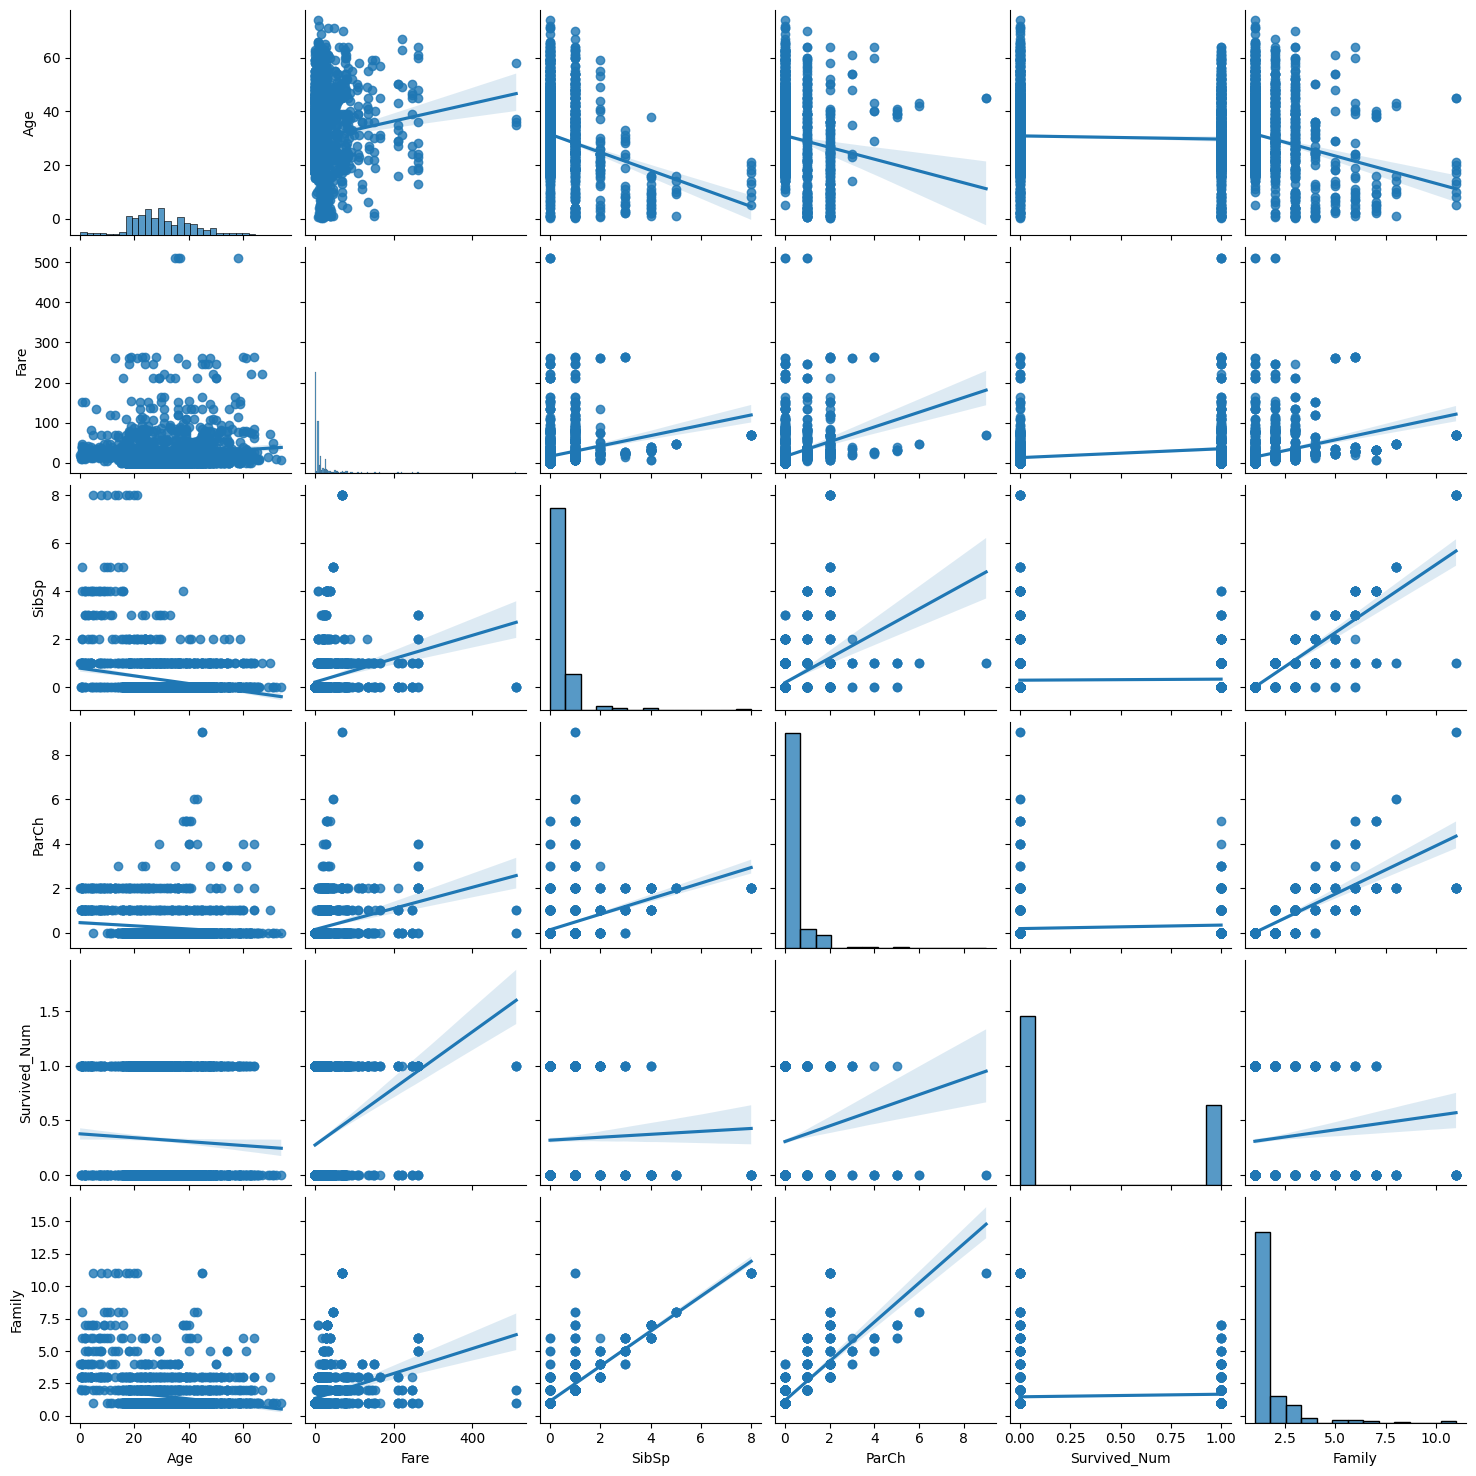

In [ ]:
#sb.pairplot(titanic)
sb.pairplot(titanic, kind='reg')
#sb.pairplot(titanic, kind='kde')

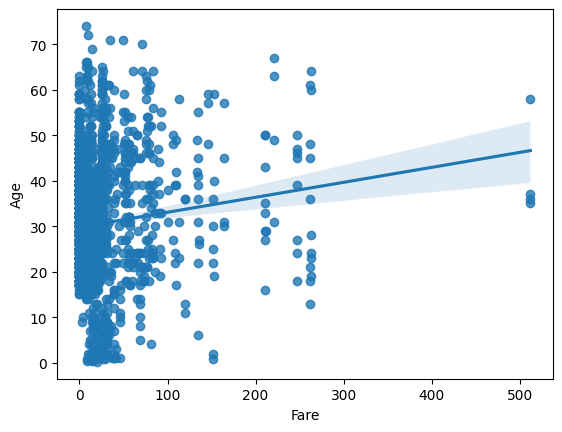

In [ ]:
sb.regplot(x='Fare',y='Age',data=titanic)
plt.show()

In [ ]:
X = titanic['Fare']
X = X.values.reshape(-1,1)
Y = titanic['Age']

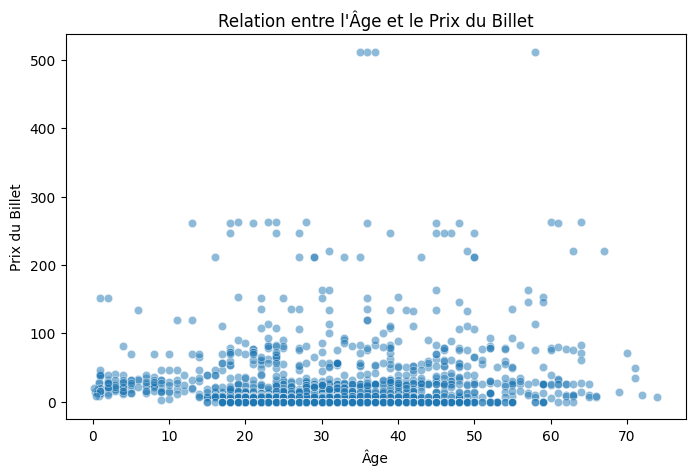

In [ ]:
plt.figure(figsize=(8,5))
sb.scatterplot(x="Age", y="Fare", data=titanic, alpha=0.5)
plt.title("Relation entre l'Âge et le Prix du Billet")
plt.xlabel("Âge")
plt.ylabel("Prix du Billet")
plt.show()

-Analyse:


*   Les points sont très dispersés, ce qui indique une faible corrélation entre l'âge et le prix du billet.
*   La majorité des passagers ont payé des billets entre 0 et 100.
*   Les billets très chers semblent plus fréquents chez les adultes.

In [ ]:
corr = titanic[['Age', 'Fare']].corr()
print(corr)

- Très faible corrélation entre Age et Fare.

#Relation entre Age et taille de la famille(Family): -Numérique Vs Numérique-

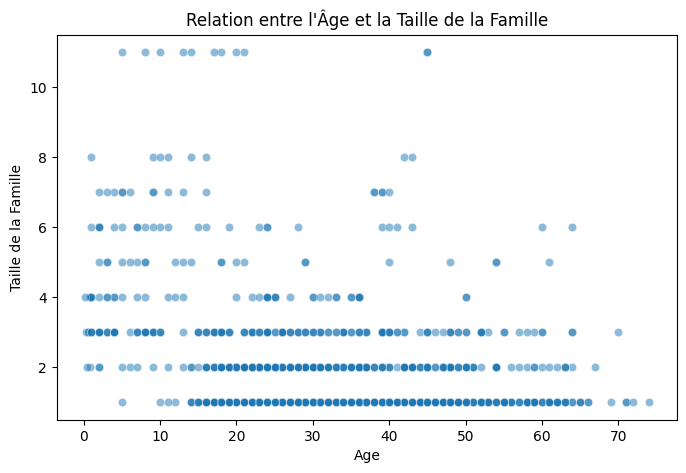

In [ ]:
plt.figure(figsize=(8,5))
sb.scatterplot(x="Age", y="Family", data=titanic, alpha=0.5)
plt.title("Relation entre l'Âge et la Taille de la Famille")
plt.xlabel("Age")
plt.ylabel("Taille de la Famille")
plt.show()


In [ ]:
corr = titanic[['Age', 'Family']].corr()
print(corr)

             Age    Family
Age     1.000000 -0.217995
Family -0.217995  1.000000


-**Interprétation**:


*   Plus l’âge augmente, plus la taille de la famille diminue légèrement
*   -0.21 Corrélation négative faible --> La relation pas très forte, mais tendancielle : les jeunes voyagent en famille, les adultes voyagent seuls.

-Interprétation:


*   Plus l’âge augmente, plus la taille de la famille diminue légèrement
*   -0.21 Corrélation négative faible --> La relation pas très forte, mais tendancielle : les jeunes voyagent en famille, les adultes voyagent seuls.

#Répartition des tarifs (Fare) par classe (NewClass)  -Numérique Vs Catégorique-


- Variable dépendante (Fare) et (NewClass) Variable indépendante
*   L'hypothèse nulle (H0) : Les classes de passagers ne font pas de différence significative sur le prix du billet.

*   L'hypothèse alternative (HA ) : Au moins une classe a un effet significatif sur le prix du billet.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols('Fare ~ NewClass', data=titanic).fit()
table = anova_lm(lm, typ=2)
print(table)

                sum_sq      df           F         PR(>F)
NewClass  1.901704e+06     3.0  625.874388  2.563673e-293
Residual  2.204921e+06  2177.0         NaN            NaN


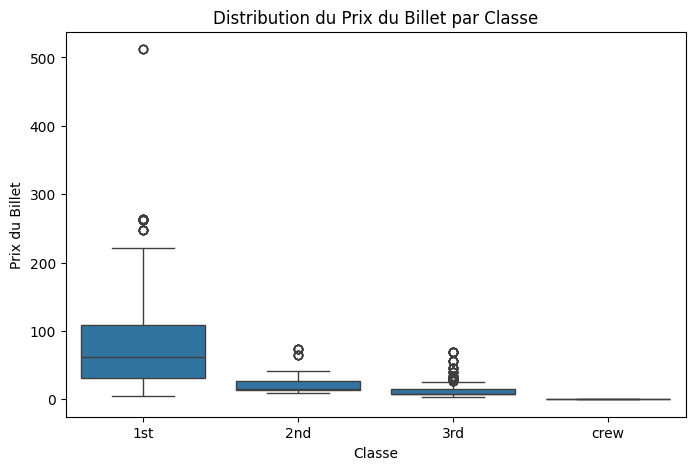

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(x="NewClass", y="Fare", data=titanic)
plt.title("Distribution du Prix du Billet par Classe")
plt.xlabel("Classe")
plt.ylabel("Prix du Billet")
plt.show()

-**Interprétation**:
- 1st --> Billets chers, et il y a une grande variation de prix (certains ont payé plus 500).


- 2nd --> Prix modéré, entre les deux extrêmes.
- 3rd --> Principalement pour les migrants et travailleurs.
crew --> Gratuit

- Les outliers en 1ère classe :
Les quelques billets à 400-500 £ étaient probablement des cabines VIP ou de luxe.

-La p-value est très faible (pratiquement 0 ),  ce qui signifie que l'effet de la classe (NewClass) sur le prix du billet (Fare) est hautement significatif --> On rejette l'hypothèse nulle.

# Relation entre Fare et Survived: -Numérique Vs Catégorique-

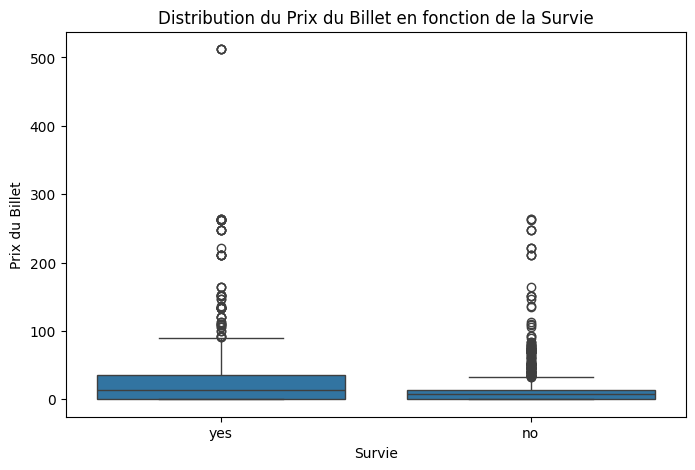

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(x="Survived", y="Fare", data=titanic)
plt.title("Distribution du Prix du Billet en fonction de la Survie")
plt.xlabel("Survie")
plt.ylabel("Prix du Billet")
plt.show()

-Interprétation:


*   Les passagers ayant payé des billets plus chers ont tendance à avoir un taux de survie plus élevé (ils étaient sur les ponts supérieurs, ils avaient plus de facilité pour évacuer).
*   Les passagers en 3ème classe étaient souvent bloqués dans les parties inférieures du bateau.
*   Les billets les plus chers (~500 £) sont exclusivement associés aux survivants, ce qui suggère que les personnes ayant payé plus cher (1ère classe) ont eu un avantage.

#Relation entre la taille de la famille(Family) et la survie(Survived) -Numérique vs Catégorique-.

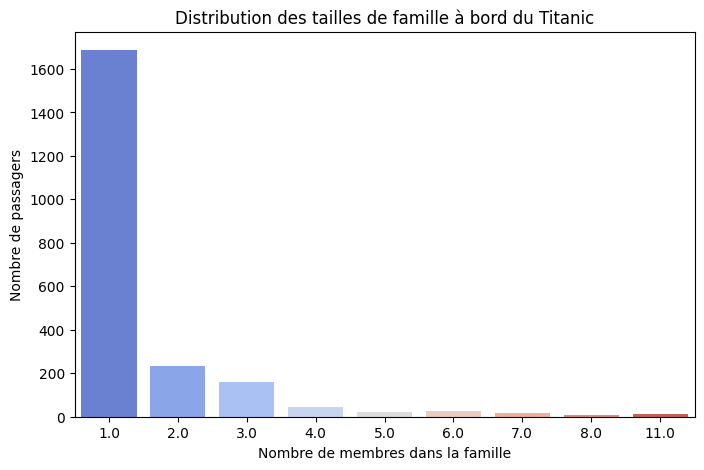

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(x="Family", data=titanic, palette="coolwarm")
plt.title("Distribution des tailles de famille à bord du Titanic")
plt.xlabel("Nombre de membres dans la famille")
plt.ylabel("Nombre de passagers")
plt.show()

-**Interprétation**:


*   un grand nombre de passagers voyageaient sans famille
*   les familles de 2 ou 3 personnes sont bien représentées (Cela correspond à des couples (conjoint(e) + 1 enfant ou pas d’enfant).)

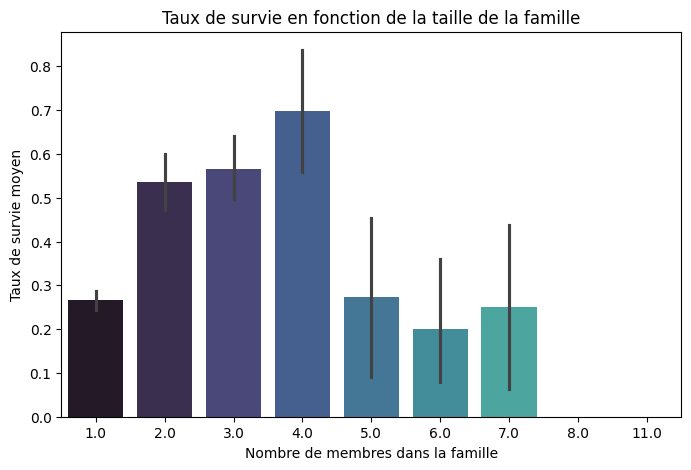

In [ ]:
plt.figure(figsize=(8,5))
sb.barplot(x="Family", y=titanic["Survived"].map({'yes':1, 'no':0}), data=titanic, palette="mako")
plt.title("Taux de survie en fonction de la taille de la famille")
plt.xlabel("Nombre de membres dans la famille")
plt.ylabel("Taux de survie moyen")
plt.show()

-**Interprétation**:
*   les personnes voyageant seules ont l'un des plus faibles taux de survie -> Les personnes seules n’avaient pas d’aide pour trouver une place dans un canot et ont été moins prioritaires dans les évacuations.
*   Les petites familles (2 à 4 membres) avaient le meilleur taux de survie (Ils pouvaient s’entraider)  -> Les femmes et enfants ont été priorisés, donc une famille de 3 membres (parents + enfant) avait de meilleures chances.
*   Les grandes familles (5 membres et plus) avaient un taux de survie plus bas (Difficile de placer toute une famille dans un canot)

#Relation entre Embarked et NewClass: -Catégorique vs Catégorique-

In [ ]:
table = pd.crosstab(titanic["Embarked"], titanic["NewClass"])
print(table)

NewClass  1st  2nd  3rd  crew
Embarked                     
Belfast     3    6    0   188
Cherb.    143   26  102     0
Queen.      3    7  113     0
South.    175  245  493   702


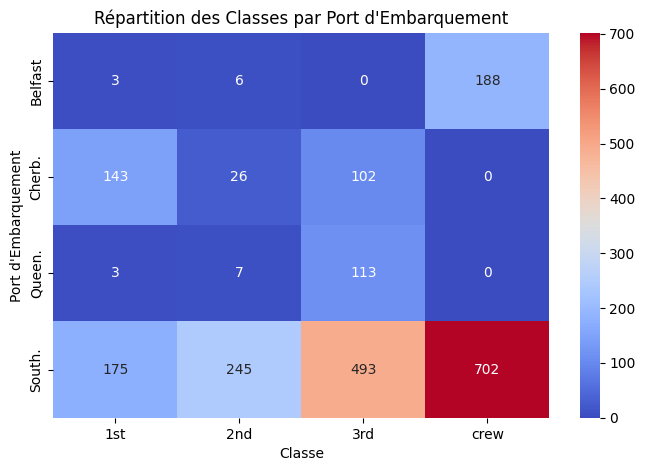

In [ ]:
plt.figure(figsize=(8,5))
sb.heatmap(table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Répartition des Classes par Port d'Embarquement")
plt.xlabel("Classe")
plt.ylabel("Port d'Embarquement")
plt.show()

-**Interprétation**:


*   South. était le port principal pour toutes les classes et l’équipage.
*   Cherb. était un port privilégié pour les riches (1ère classe).
*   Queenstown embarquait surtout des passagers de 3ème classe.
*   Belfast a principalement fourni l’équipage, peu de passagers.


#Relation entre Gender et Survived: -Catégorique vs Catégorique-

Survived    no  yes
Gender             
female     130  359
male      1366  351


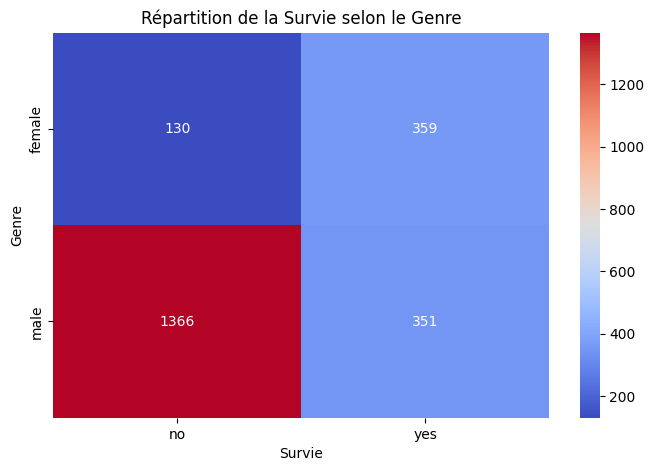

In [ ]:
table = pd.crosstab(titanic["Gender"], titanic["Survived"])
print(table)

plt.figure(figsize=(8,5))
sb.heatmap(table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Répartition de la Survie selon le Genre")
plt.xlabel("Survie")
plt.ylabel("Genre")
plt.show()

-Interprétation:


*   Les femmes ont un taux de survie plus élevé que les hommes.
*   La majorité des hommes n'ont pas survécu.
*   Le nombre de survivants est similaire entre les deux genres (359 femmes vs 351 hommes), mais avec une distribution totalement différente.


#Effectuer une Analyse of Variance en fonction de NewClass et Gender

In [ ]:
lm = ols('Fare ~ NewClass + Gender', data=titanic).fit()
table = anova_lm(lm, typ=2)
print(table)

                sum_sq      df           F         PR(>F)
NewClass  1.573823e+06     3.0  527.660787  1.201701e-257
Gender    4.151173e+04     1.0   41.753326   1.273818e-10
Residual  2.163409e+06  2176.0         NaN            NaN


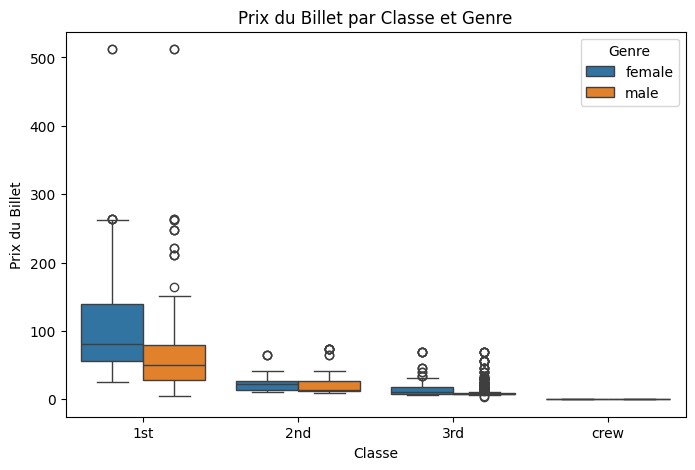

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(x="NewClass", y="Fare", hue="Gender", data=titanic)
plt.title("Prix du Billet par Classe et Genre")
plt.xlabel("Classe")
plt.ylabel("Prix du Billet")
plt.legend(title="Genre")
plt.show()

-**Interprétation**:

*   PR(>F) = 1.29e-10 : p-value très faible, donc le genre influence aussi le prix du billet.
Cela signifie que les femmes et les hommes n'ont pas payé les mêmes prix, mais la classe reste le facteur dominant.


#Relation entre NewClass et Gender avec Survived

Survived          no  yes
NewClass Gender          
1st      female    5  139
         male    118   62
2nd      female   12   94
         male    154   24
3rd      female  110  106
         male    418   74
crew     female    3   20
         male    676  191


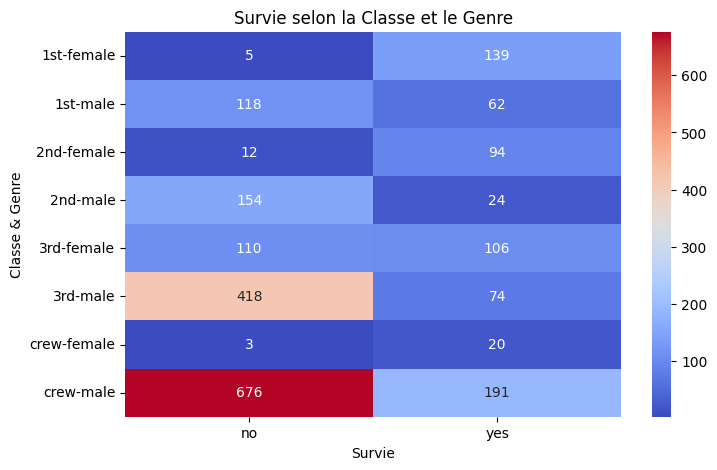

In [ ]:
table = pd.crosstab([titanic["NewClass"], titanic["Gender"]], titanic["Survived"])
print(table)

plt.figure(figsize=(8,5))
sb.heatmap(table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Survie selon la Classe et le Genre")
plt.xlabel("Survie")
plt.ylabel("Classe & Genre")
plt.show()

-Interprétation:


*   Les femmes en 1ère et 2ème classe ont eu les meilleures chances de survie.
*   Les hommes ont eu un faible taux de survie, indépendamment de leur classe --> Ce qui confirme la règle "Femmes et enfants d’abord" appliquée à bord du Titanic.
*   Les hommes en 3ème classe ont eu un taux de survie très faible (15%), ce qui montre qu’ils étaient bloqués ou qu’ils n’ont pas eu accès aux canots.